In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
network = models.Sequential()

transforming_length = len(train_images[0]) * len(train_images[0][0])

network.add(layers.Dense(512, activation='relu', input_shape=(transforming_length, ) ))

network.add(layers.Dense(256, activation='relu'))

network.add(layers.Dense(128, activation='relu'))

network.add(layers.Dense(10, activation='softmax'))

In [4]:
train_images = train_images.reshape((len(train_images), transforming_length ))

test_images = test_images.reshape((len(test_images), transforming_length ))

In [5]:
train_images = train_images / 255

test_images = test_images / 255

In [6]:
train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)

In [7]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
network.fit( train_images, train_labels, epochs=5, batch_size = 128 )

Epoch 1/5
469/469 [==============================] - 6s 14ms/step - loss: 0.2400 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0880 - accuracy: 0.9731
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0581 - accuracy: 0.9822
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0335 - accuracy: 0.9902


In [9]:
network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0850 - accuracy: 0.9790


[0.08499400317668915, 0.9789999723434448]

### IMDB Dataset

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverese_word_index = dict ([ (value,key) for (key,value) in word_index.items() ])

In [7]:
" ".join([ reverese_word_index.get( i-3 ,"") for i in train_data[0] ])

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [8]:
def decode(reverese_word_index, value):
    return " ".join([ reverese_word_index.get( i-3 ,"") for i in value ])

def decode_all(reverese_word_index, array):
    return [decode(reverese_word_index, value) for value in array ]
    
decode_all(reverese_word_index,train_data)[0]

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [9]:
import numpy as np

def vectorize_seq(seq, dim = 10000):
    results = np.zeros((len(seq), dim))
    for i, sequence in enumerate(seq):
        results[i, sequence] = 1.
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [11]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Other ways to compile

# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss='binary_crossentropy',
# metrics=['accuracy'])
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
# loss=losses.binary_crossentropy,
# metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 77ms/step - loss: 0.5548 - acc: 0.7889 - val_loss: 0.4335 - val_acc: 0.8621
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3431 - acc: 0.8963 - val_loss: 0.3233 - val_acc: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2428 - acc: 0.9246 - val_loss: 0.2859 - val_acc: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1891 - acc: 0.9397 - val_loss: 0.2776 - val_acc: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1542 - acc: 0.9494 - val_loss: 0.2790 - val_acc: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1270 - acc: 0.9598 - val_loss: 0.2980 - val_acc: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1039 - acc: 0.9691 - val_loss: 0.3165 - val_acc: 0.8824
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0885 - a

In [17]:
import matplotlib.pyplot as plt

loss_values = history.history['loss']

val_loss_values = history.history['val_loss']

epochs = range(1, len(history.history['acc']) + 1)

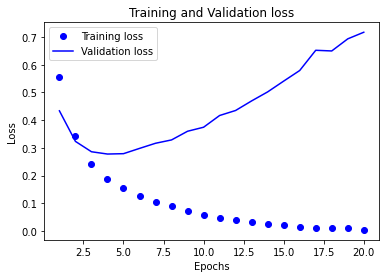

In [18]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')

plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

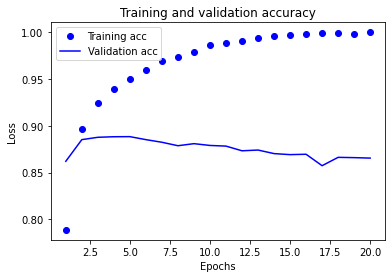

In [19]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
plt.plot(epochs, history.history['acc'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 24ms/step - loss: 0.4505 - accuracy: 0.8270
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2575 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2000 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2919 - accuracy: 0.8845


In [21]:
model.predict(x_test)

array([[0.22297263],
       [0.9998121 ],
       [0.89501476],
       ...,
       [0.16329336],
       [0.06110927],
       [0.59175295]], dtype=float32)

In [22]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [23]:
x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
# Built-in method

# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [27]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 2.5707 - accuracy: 0.5361 - val_loss: 1.7534 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.4358 - accuracy: 0.7115 - val_loss: 1.3262 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.0641 - accuracy: 0.7761 - val_loss: 1.1415 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 39ms/step - loss: 0.8413 - accuracy: 0.8225 - val_loss: 1.0483 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6712 - accuracy: 0.8608 - val_loss: 0.9737 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5373 - accuracy: 0.8877 - val_loss: 0.9391 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4341 - accuracy: 0.9113 - val_loss: 0.8982 - val_accuracy: 0.8170
Epoch 8/20
16

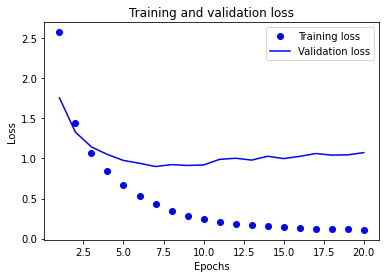

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

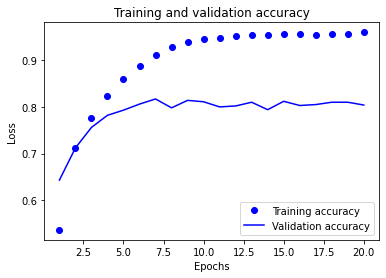

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 62ms/step - loss: 2.6220 - accuracy: 0.5462 - val_loss: 1.7530 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 40ms/step - loss: 1.4428 - accuracy: 0.7030 - val_loss: 1.3404 - val_accuracy: 0.7050
Epoch 3/9
16/16 [==============================] - 1s 40ms/step - loss: 1.0756 - accuracy: 0.7705 - val_loss: 1.1499 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 40ms/step - loss: 0.8475 - accuracy: 0.8136 - val_loss: 1.0469 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 1s 39ms/step - loss: 0.6770 - accuracy: 0.8621 - val_loss: 1.0175 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5428 - accuracy: 0.8903 - val_loss: 0.9440 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 39ms/step - loss: 0.4327 - accuracy: 0.9129 - val_loss: 0.9162 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [33]:
results

[1.0177124738693237, 0.7827248573303223]

In [34]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18388245770258238

In [35]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

0.9999999

In [37]:
np.argmax(predictions[0])

3

In [38]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [40]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(4, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 3.3735 - accuracy: 0.3682 - val_loss: 3.0454 - val_accuracy: 0.3080
Epoch 2/20
63/63 [==============================] - 2s 25ms/step - loss: 2.7977 - accuracy: 0.2553 - val_loss: 2.6794 - val_accuracy: 0.2570
Epoch 3/20
63/63 [==============================] - 1s 21ms/step - loss: 2.4280 - accuracy: 0.2577 - val_loss: 2.3655 - val_accuracy: 0.2600
Epoch 4/20
63/63 [==============================] - 1s 23ms/step - loss: 2.0165 - accuracy: 0.3017 - val_loss: 1.9361 - val_accuracy: 0.2990
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.6580 - accuracy: 0.4831 - val_loss: 1.7603 - val_accuracy: 0.5480
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 1.4817 - accuracy: 0.6081 - val_loss: 1.6641 - val_accuracy: 0.6000
Epoch 7/20
63/63 [==============================] - 1s 21ms/step - loss: 1.3503 - accuracy: 0.6329 - val_loss: 1.6601 - val_accuracy: 0.5960
Epoch 8/20
63

### Boston Housing

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [5]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [6]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [7]:
all_scores

[2.0404868125915527,
 3.5406203269958496,
 2.9049293994903564,
 2.6306536197662354]

In [8]:
np.mean(all_scores)

2.7791725397109985

In [12]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],
                            axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

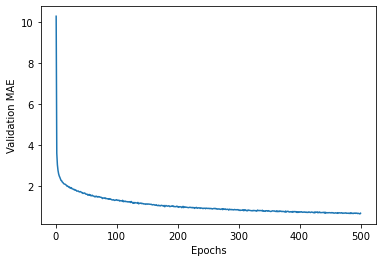

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

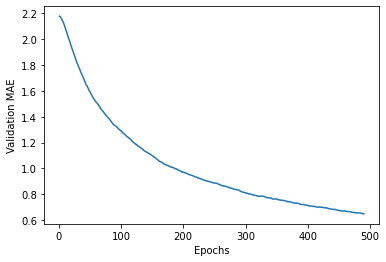

In [15]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 998us/step - loss: 16.8076 - mae: 2.6891


In [17]:
test_mae_score

2.689145565032959